## 0.0 Entender o problema

-- Objetivo do problema:
    -- 1.0 Previsão do primeiro destino que um novo usuário irá escolher.
    
    --Porque?
      --Qual tipo de modelo de negócio do Airbnb?
        --Marketplace (Conectar pessoas que oferecem acomodação, com as pessoas que estão procurando acomodação).
        
        --Oferta (pessoas oferecendo acomodação)
            --Tamanho do Portfólio.
            -- diversidade/Densidade de Portfólio.
            --Preço médio
        
        --Demanda (pessoa procurando acomodação)
             --Número de Usuários 
             --LTV (LifeTime Value)
             --CAC (Client Aquisition Cost)
        
        Gross Revenue = (Fee * Numero de clientes) - CAC
        
        --Demanda (pessoas procurando acomodação)
        
        
--Proposta da solução:

    --- Modelo de previsão do primeiro destino de um novo usuário.
    
    --- 1.0 Predições e salvar em uma tabela de bando de dados.
    
    ---2.0 Criar uma API
        --- Input: usuario  e suas caracteristicas
        --- Output: usuario e suas caracteristicas com a ** predição do destino**.

        
        

# 0.0 <font color ='red'>Ciclo01: End to End </font>

# 0.0 Imports

In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt
import sklearn.model_selection

from keras import models as ml
from keras import layers as l


# 0.1 Helper functions

# 0.2 Loading Data

In [3]:
# datasets source: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data?select=sessions.csv.zip


df_raw = pd.read_csv('dataset/training_users_2.csv', low_memory=True)
df_raw.shape

df_sessions = pd.read_csv('dataset/sessions.csv', low_memory=True)
df_sessions.shape

(10567737, 6)

# 1.0 Data Description

In [4]:
df1 = df_raw.copy()

## 1.1 Data Dimensions

In [5]:
print( 'Number of rows: {}'.format(df1.shape[0] ) )
print( 'Number of columns: {}'.format(df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


In [6]:
print( 'Number of rows: {}'.format(df_sessions.shape[0] ) )
print( 'Number of columns: {}'.format(df_sessions.shape[1] ) )

Number of rows: 10567737
Number of columns: 6


## 1.3 Data type

In [7]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
df_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.3 NA Check

In [9]:
df1.isna().sum() / len(df1)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [10]:
aux = df1[df1["age"].isna()]
aux ['country_destination'].value_counts(normalize=True)

NDF      0.768428
US       0.156529
other    0.028617
FR       0.014888
IT       0.009081
GB       0.006251
ES       0.006171
CA       0.003989
DE       0.002387
NL       0.001818
AU       0.001171
PT       0.000671
Name: country_destination, dtype: float64

In [11]:
df1["age"].max()

2014.0

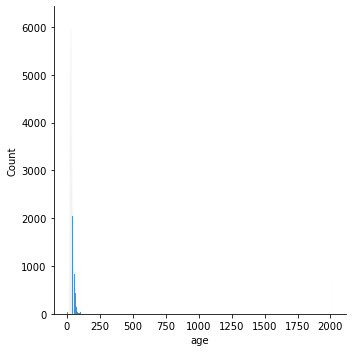

In [12]:
sns.displot(df1["age"])

In [13]:
df1['first_affiliate_tracked'].drop_duplicates()

0            untracked
5                  omg
12                 NaN
13              linked
79       tracked-other
257            product
6270         marketing
11184        local ops
Name: first_affiliate_tracked, dtype: object

In [14]:
df_sessions.isna().sum() / len(df_sessions)

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [15]:
#remove missing value complety
#df1 = df1.dropna()

#========================USER===========================================

# date_first_booking 
date_first_booking_max = pd.to_datetime( df1['date_first_booking']).max().strftime('%Y-%m-%d')
df1['date_first_booking'] = df1['date_first_booking'].fillna(date_first_booking_max)

# age
avg_age = round(df1["age"].mean(),2)
df1['age'] = df1["age"].fillna(avg_age)

# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]

df1['first_affiliate_tracked'].value_counts()

#========================Sessions=========================================
#user_id  - 3%
df_sessions= df_sessions[~df_sessions['user_id'].isna()]

#action - 7%
df_sessions= df_sessions[~df_sessions['action'].isna()]

#action_type - 10$
df_sessions= df_sessions[~df_sessions['action_type'].isna()]

#action_detail- 10%
df_sessions= df_sessions[~df_sessions['action_detail'].isna()]

#device_type - 0%
df_sessions= df_sessions[~df_sessions['device_type'].isna()]

#secs_elapsed - 0%
df_sessions= df_sessions[~df_sessions['secs_elapsed'].isna()]

In [16]:
df_sessions.isna().sum() / len(df_sessions)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

In [17]:
df1.isna().sum() / len(df1)

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

## 1.4 Change Data Type

In [18]:
# date_account_created    
df1["date_account_created"] = pd.to_datetime( df1["date_account_created"] )

# timestamp_first_active   
df1["timestamp_first_active"] = pd.to_datetime( df1["timestamp_first_active"], format='%Y%m%d%H%M%S' )

# date_first_booking       
df1["date_first_booking"] = pd.to_datetime( df1["date_first_booking"] )

# age       
df1["age"] = df1["age"].astype( int )

In [19]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int32
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.5 Check Balanced Data

In [20]:
df1["country_destination"].value_counts(normalize=True)

NDF      0.579673
US       0.294461
other    0.048128
FR       0.023623
IT       0.013458
GB       0.011066
ES       0.010671
CA       0.006707
DE       0.005020
NL       0.003621
AU       0.002541
PT       0.001032
Name: country_destination, dtype: float64

# 2.0 Data filtering

In [21]:
df2 = df1.copy()

# 2.1 Filtering Rows

# 2.1 Columns Selection

# 3.0 Data Preparation

In [22]:
df3 = df2.copy()

In [23]:
#dummies variables.
df3_dummy = pd.get_dummies(df3.drop( ['id','country_destination'], axis=1) )

# join id and country destination
df3 = pd.concat( [df3[["id","country_destination"]],df3_dummy], axis=1 )  
                     

# 4.0 Feature Selecion

In [24]:
cols_drop = ["date_account_created", "timestamp_first_active","date_first_booking" ] # original dates
df4 = df3.drop(cols_drop, axis=1)

In [25]:
df4.sample().T

,115137
id,ebn3rf5h3r
country_destination,NDF
age,49
signup_flow,25
gender_-unknown-,1
...,...
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0
first_browser_Yandex.Browser,0


In [26]:
X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()

In [27]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

# 5.0 Machine Learning - Neural Network - MLP

In [28]:
x_train = X_train.drop("id", axis=1)
x_test = X_test.drop("id", axis=1)
x_train.shape[1]

132

## 5.1. Baseline Model 

In [29]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
# adding the weights according to column distribution "country_destination"
country_destination_weights= df1['country_destination'].value_counts(normalize=True).sort_index().tolist()
# random model

yhat_random = random.choices(population=country_destination_list,
                             weights=country_destination_weights,              
                             k=k_num)
len(yhat_random)

41478

## 5.1.1 Baseline Model Performance

Accuracy: 0.4258643136120353
Balanced Accuracy: 0.08320023806723771
Kappa Score: 0.08320023806723771
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       111
          CA       0.02      0.02      0.02       281
          DE       0.01      0.00      0.00       215
          ES       0.01      0.01      0.01       428
          FR       0.03      0.03      0.03      1021
          GB       0.01      0.01      0.01       426
          IT       0.01      0.01      0.01       570
         NDF       0.58      0.58      0.58     23996
          NL       0.00      0.00      0.00       146
          PT       0.00      0.00      0.00        48
          US       0.30      0.29      0.29     12280
       other       0.05      0.05      0.05      1956

    accuracy                           0.43     41478
   macro avg       0.08      0.08      0.08     41478
weighted avg       0.43      0.43      0.43     41478



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

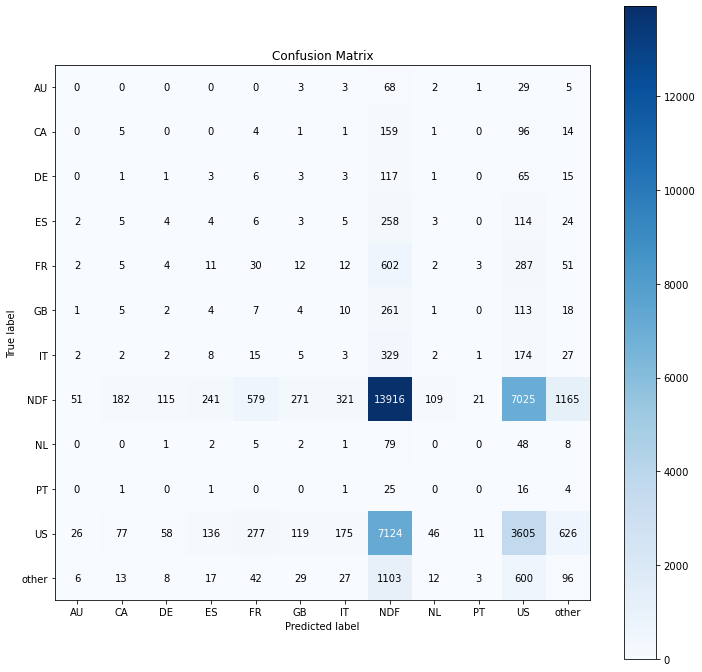

In [30]:
# Acurracy
acc_random = m.accuracy_score(y_test, yhat_random )
print("Accuracy: {}".format(acc_random))

# Balanced accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print("Balanced Accuracy: {}".format(balanced_acc_random))

#Kappa Metrics
Kappa_random = m.cohen_kappa_score(y_test, yhat_random)
print("Kappa Score: {}".format(balanced_acc_random))

#Classification report
print(m.classification_report(y_test, yhat_random))


# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_random, normalize=False, figsize=(12,12) )

# 5.0 Neural Network - MLP

In [31]:
# One Hot Encoder
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape(-1, 1) ).toarray()

In [32]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
# model definition
model = ml.Sequential()
model.add(l.Dense( 128,input_dim=x_train.shape[1], activation='relu') )
model.add(l.Dense(12, activation="softmax") )

# model compile
model.compile( loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"] )

model.fit( x_train, y_train_nn, epochs=100, verbose=0)

Epoch 1/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.2372 - accuracy: 0.5850
Epoch 2/100
5185/5185 [==============================] - 10s 2ms/step - loss: 1.1617 - accuracy: 0.6054
Epoch 3/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.1181 - accuracy: 0.6167
Epoch 4/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.0946 - accuracy: 0.6200
Epoch 5/100
5185/5185 [==============================] - 10s 2ms/step - loss: 1.0877 - accuracy: 0.6212
Epoch 6/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.0868 - accuracy: 0.6217
Epoch 7/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.0848 - accuracy: 0.6225
Epoch 8/100
5185/5185 [==============================] - 9s 2ms/step - loss: 1.0830 - accuracy: 0.6233
Epoch 9/100
5185/5185 [==============================] - 10s 2ms/step - loss: 1.0827 - accuracy: 0.6233
Epoch 10/100
5185/5185 [==============================] - 9s 2ms/step 

In [36]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

## 5.2.2 NN Performance

Accuracy: 0.6288152755677708
Balanced Accuracy: 0.10822192469811469
Kappa Score: 0.24730798380006713


C:\Users\jonys.arcanjo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonys.arcanjo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonys.arcanjo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       111
          CA       0.00      0.00      0.00       281
          DE       0.00      0.00      0.00       215
          ES       0.14      0.00      0.00       428
          FR       0.50      0.00      0.00      1021
          GB       0.00      0.00      0.00       426
          IT       0.00      0.00      0.00       570
         NDF       0.67      0.87      0.76     23996
          NL       0.00      0.00      0.00       146
          PT       0.00      0.00      0.00        48
          US       0.50      0.43      0.46     12280
       other       0.00      0.00      0.00      1956

    accuracy                           0.63     41478
   macro avg       0.15      0.11      0.10     41478
weighted avg       0.55      0.63      0.58     41478



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

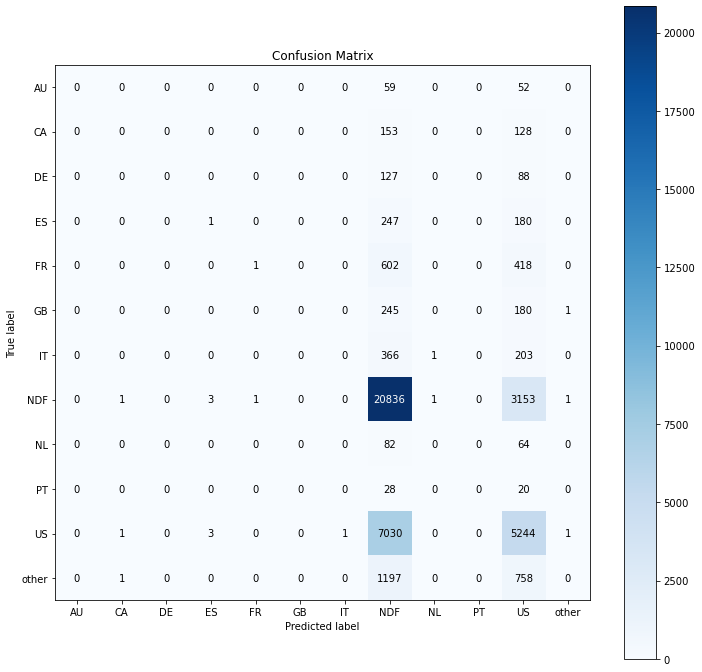

In [37]:
# Acurracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn )
print("Accuracy: {}".format(acc_nn))

# Balanced accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print("Balanced Accuracy: {}".format(balanced_acc_nn))

#Kappa Metrics
Kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print("Kappa Score: {}".format(Kappa_nn))

#Classification report
print(m.classification_report(y_test_nn, yhat_nn))


# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12) )
#

## 5.2.3 NN Performance - Crsso Validation

In [39]:
# generate k-fold
num_folds = 5
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=32)

balanced_acc_nn_list =[]
Kappa_nn_list = []
i = 1
for train_ix, val_ix in kfold.split(x_train, y_train):
    print("fold number: {}/{}".format(i, num_folds))
          
    # get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # target hot-encoding --> categorical to numeral
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1, 1)).toarray()

    # model defition
    model = ml.Sequential()
    model.add(l.Dense(256, input_dim=x_train.shape[1], activation="relu"))
    model.add(l.Dense(12, activation="softmax"))

    # compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # training model
    model.fit(x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0)

    # prediction
    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform(pred_nn) # numeral to categorical


    # prepare data
    y_test_nn = y_val_fold.to_numpy()
    Yhat_nn = yhat_nn.reshape(-1, 1)[0]

    # metrics

    # Balanced accuracy
    balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_nn_list.append(balanced_acc_nn)
    #print("Balanced Accuracy: {}".format(balanced_acc_nn))

    #Kappa Metrics
    Kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
    Kappa_nn_list.append(Kappa_nn)
    #print("Kappa Score: {}".format(Kappa_nn))

    i += 1

fold number: 1/5
fold number: 2/5
fold number: 3/5
fold number: 4/5
fold number: 5/5


In [49]:
print("avg Balanced Accuracy:  {} +/- {}".format(round(np.mean(balanced_acc_nn_list), 4),
                                                np.round(np.std(balanced_acc_nn_list), 4)))


avg Balanced Accuracy:  0.1059 +/- 0.0023


In [50]:
print("avg Kappa score: {} +/- {}".format(np.round(np.mean(Kappa_nn_list), 4),
                                          np.round(np.std(Kappa_nn_list), 4)))

avg Kappa score: 0.2244 +/- 0.0188
